In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | cesky krumlov
Processing Record 3 of Set 1 | olafsvik
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | aguimes
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | lamphun
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | yazd
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | fay

Processing Record 37 of Set 4 | sechura
Processing Record 38 of Set 4 | copainala
Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | najran
Processing Record 41 of Set 4 | pangai
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | yar-sale
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | santa maria del rio
Processing Record 48 of Set 4 | bima
Processing Record 49 of Set 4 | helena
Processing Record 50 of Set 4 | kudahuvadhoo
Processing Record 1 of Set 5 | esmeralda
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | phonhong
Processing Record 4 of Set 5 | barentu
Processing Record 5 of Set 5 | hamina
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | ca mau
Processing Record 8 of Set 5 | shelburne
Processing Record 9 of Set 5 | taywarah
Processing Record 10 of Set 5 | vaitupu
City not found. Skippin

Processing Record 27 of Set 8 | seoul
Processing Record 28 of Set 8 | puro
Processing Record 29 of Set 8 | ghanzi
Processing Record 30 of Set 8 | kalevala
Processing Record 31 of Set 8 | qui nhon
Processing Record 32 of Set 8 | zaysan
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | palaikastron
Processing Record 35 of Set 8 | vaasa
Processing Record 36 of Set 8 | panama city
Processing Record 37 of Set 8 | mandiana
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | tshane
Processing Record 42 of Set 8 | jiuquan
Processing Record 43 of Set 8 | pavlodar
Processing Record 44 of Set 8 | makushino
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | jujuy
City not found. Skipping...
Processing Record 47 of Set 8 | wuan
Processing Record 48 of Set 8 | sao desiderio
Processing Record 49 of Set 8 | malaryta
Processing Record 50 of Set 8 | tamala
Proc

Processing Record 17 of Set 12 | karaul
City not found. Skipping...
Processing Record 18 of Set 12 | suna
Processing Record 19 of Set 12 | emba
Processing Record 20 of Set 12 | revda
Processing Record 21 of Set 12 | mahajanga
Processing Record 22 of Set 12 | los llanos de aridane
Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 12 | santa isabel do rio negro
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | northampton
Processing Record 28 of Set 12 | aylmer
Processing Record 29 of Set 12 | thanh hoa
Processing Record 30 of Set 12 | stoyba
City not found. Skipping...
Processing Record 31 of Set 12 | guanica
Processing Record 32 of Set 12 | hirado
Processing Record 33 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 34 of Set 12 | romny
Processing Record 35 of Set 12 | manzhouli
Processing Record 36 of Set 12 | takaungu
Processing Record 37 of Se

In [7]:
len(city_data)

551

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,42.78,86,100,7.16,US,2021-10-20 14:23:33
1,Cesky Krumlov,48.8109,14.3152,71.85,62,82,4.29,CZ,2021-10-20 14:23:33
2,Olafsvik,64.8945,-23.7142,35.96,60,100,3.89,IS,2021-10-20 14:23:33
3,Bambous Virieux,-20.3428,57.7575,75.45,73,40,10.36,MU,2021-10-20 14:23:34
4,Bethel,41.3712,-73.4140,65.28,73,1,3.00,US,2021-10-20 14:23:34
5,Provideniya,64.3833,-173.3000,24.04,90,53,5.39,RU,2021-10-20 14:18:47
6,Bredasdorp,-34.5322,20.0403,76.28,53,52,16.26,ZA,2021-10-20 14:23:35
7,Aguimes,27.9054,-15.4461,75.00,73,20,20.71,ES,2021-10-20 14:23:35
8,Punta Arenas,-53.1500,-70.9167,48.31,53,75,23.02,CL,2021-10-20 14:18:39
9,Coquimbo,-29.9533,-71.3436,56.93,82,90,5.75,CL,2021-10-20 14:23:35


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-10-20 14:23:33,57.7900,-152.4072,42.78,86,100,7.16
1,Cesky Krumlov,CZ,2021-10-20 14:23:33,48.8109,14.3152,71.85,62,82,4.29
2,Olafsvik,IS,2021-10-20 14:23:33,64.8945,-23.7142,35.96,60,100,3.89
3,Bambous Virieux,MU,2021-10-20 14:23:34,-20.3428,57.7575,75.45,73,40,10.36
4,Bethel,US,2021-10-20 14:23:34,41.3712,-73.4140,65.28,73,1,3.00
...,...,...,...,...,...,...,...,...,...
546,Alofi,NU,2021-10-20 14:26:21,-19.0595,-169.9187,71.49,78,68,9.22
547,Sobolevo,RU,2021-10-20 14:26:21,54.4299,31.8996,39.78,88,100,19.51
548,Sinnamary,GF,2021-10-20 14:26:21,5.3833,-52.9500,85.10,70,44,8.72
549,Tabou,CI,2021-10-20 14:26:22,4.4230,-7.3528,81.12,79,100,9.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

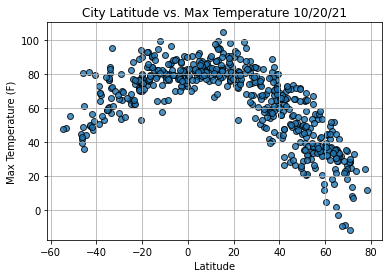

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

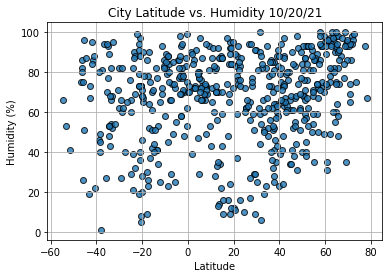

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

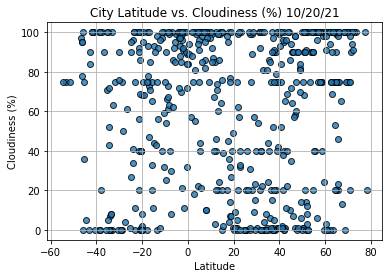

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

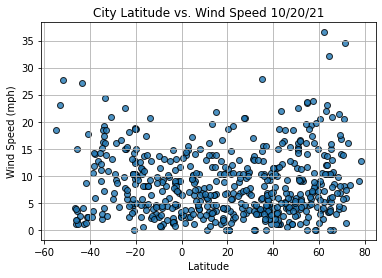

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()